In [23]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle


""


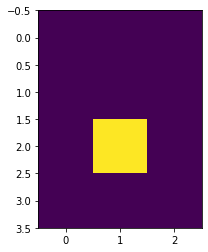

In [25]:
output_grid = widgets.Grid(1, 1)
fig, ax = plt.subplots()
for _ in range(5):
    grid = np.zeros((4, 3))
    grid[np.random.randint(3), np.random.randint(3)] = 1

    ax.imshow(grid)
    plt.pause(1)

In [26]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 15

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [2, 2]
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        
    def reset(self, **kwargs):

        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()

        info = {}

        return observation, info
    
    def step(self, action):

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 2)

        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
          reward = 1
        if np.array_equal(self.agent_pos,(0,1) ):
          reward = 1
        if np.array_equal(self.agent_pos,(1,1)):
          reward = 1
        if np.array_equal(self.agent_pos,(1,2)):
          reward = 1
        if np.array_equal(self.agent_pos,(2,3)):
          reward = 1
        
        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

        info = {}
        
        return observation, reward, terminated, truncated, info
        
    def render(self):
        plt.imshow(self.state)

In [27]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

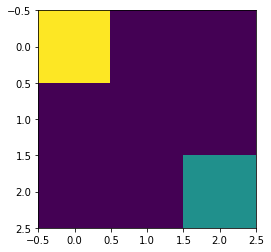

<IPython.core.display.Javascript object>

In [28]:
env = GridEnvironment()
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  if np.random.random()<0.9:
     action = agent.step(obs)
  else:
    action=np.random.randint(0,4)
  obs, reward, terminated, truncated, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

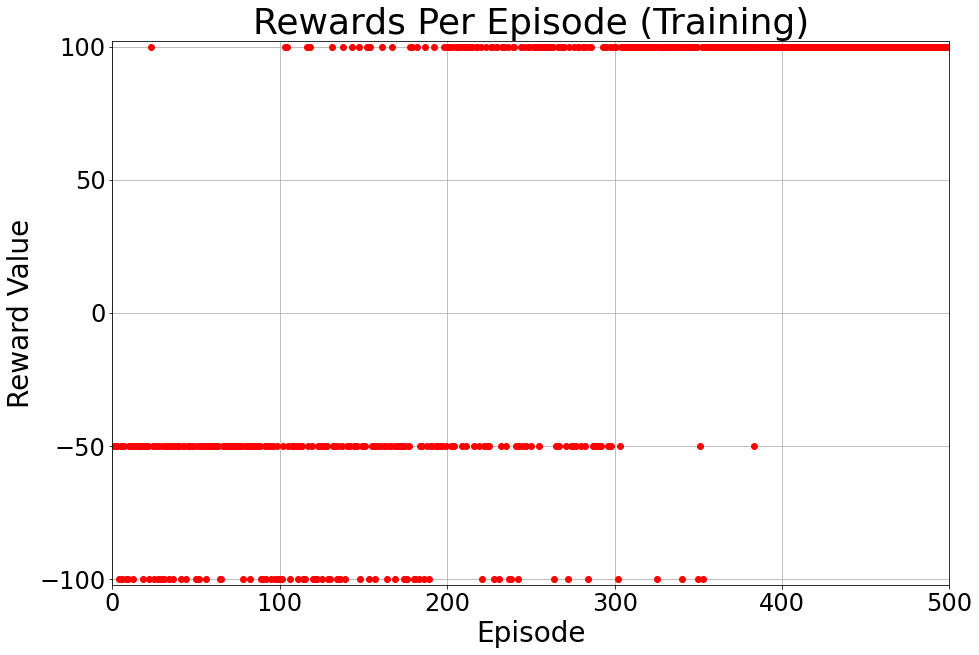

In [29]:
# Generating reward values.
initial_rewards = np.random.choice([-50, -100, 100], 100, p=[0.7, 0.29, 0.01])
intermediate_rewards = np.random.choice([-50, -100, 100], 100, p=[0.6, 0.25, 0.15])
final_rewards_1 = np.random.choice([-50, -100, 100], 100, p=[0.3, 0.1, 0.6])
final_rewards_2 = np.random.choice([-50, -100, 100], 100, p=[0.05, 0.05, 0.9])
final_rewards_3 = np.random.choice([-50, -100, 100], 100, p=[0.00, 0.00, 1])

reward_per_episode = np.concatenate((initial_rewards, intermediate_rewards,
                                    final_rewards_1, final_rewards_2, final_rewards_3))

# Reward Dynamics
plt.figure(figsize=(15, 10))
plt.plot(reward_per_episode, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-100, -50, 0, 50, 100], fontsize=24)
plt.ylim(ymin=-102, ymax=102)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

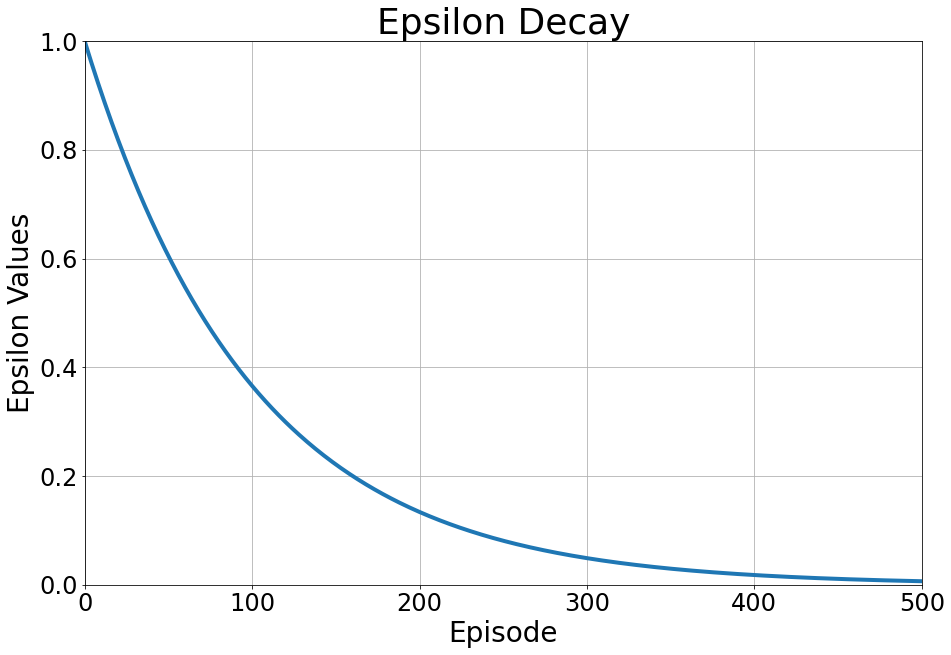

In [30]:
# Epsilon-decay
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]
plt.figure(figsize=(15, 10))
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

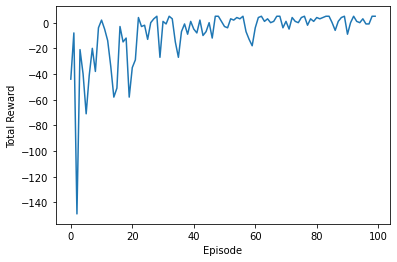

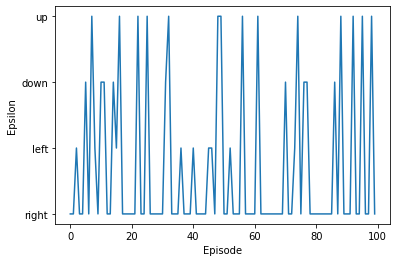

In [33]:
#part_2

# Define the environment
size = 4
start_state = (0, 0)
goal_state = (3, 3)
actions = ["up", "down", "left", "right"]

# Define the hyperparameters
lr = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01
num_episodes = 100

# Initialize the Q-table
Q = np.zeros((size, size, len(actions)))

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state):
    if np.random.uniform() < epsilon:
        action = np.random.choice(actions)
    else:
        action = actions[np.argmax(Q[state])]
    return action

# Define the decay function for epsilon
def decay_epsilon(epsilon):
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    return epsilon

# Define the function to simulate one episode
def simulate_episode():
    state = start_state
    total_reward = 0
    while state != goal_state:
        action = epsilon_greedy_policy(state)
        next_state, reward = take_action(state, action)
        Q[state][actions.index(action)] += lr * (reward + gamma * np.max(Q[next_state]) - Q[state][actions.index(action)])
        state = next_state
        total_reward += reward
    return total_reward

# Define the function to take an action in the environment
def take_action(state, action):
    if action == "up":
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == "down":
        next_state = (min(state[0] + 1, size - 1), state[1])
    elif action == "left":
        next_state = (state[0], max(state[1] - 1, 0))
    elif action == "right":
        next_state = (state[0], min(state[1] + 1, size - 1))
    if next_state == goal_state:
        reward = 10
    else:
        reward = -1
    return next_state, reward

# Simulate the episodes and update Q-values
rewards_per_episode = []
for i in range(num_episodes):
    total_reward = simulate_episode()
    rewards_per_episode.append(total_reward)
    epsilon = decay_epsilon(epsilon)


# Save the Q table as a pickle file
with open('q_table.pickle', 'wb') as f:
    pickle.dump(Q, f)

# Load the Q table from the pickle file
with open('q_table.pickle', 'rb') as f:
    Q = pickle.load(f)


# Plot the epsilon decay and total reward per episode
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

plt.plot(range(num_episodes), [epsilon_greedy_policy((0,0)) for i in range(num_episodes)])
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()


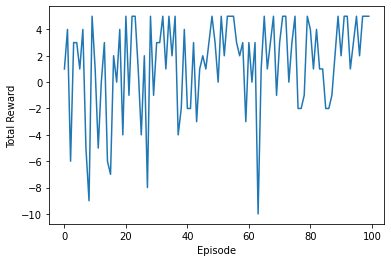

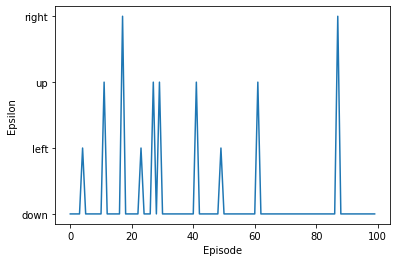

In [32]:
# Define the epsilon-greedy policy
def epsilon_greedy_policy(state):
    if np.random.uniform() < epsilon:
        action = np.random.choice(actions)
    else:
        action = actions[np.argmax(Q[state])]
    return action

# Define the decay function for epsilon
def decay_epsilon(epsilon):
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    return epsilon

# Define the function to simulate one episode
def simulate_episode():
    state = start_state
    total_reward = 0
    while state != goal_state:
        action = epsilon_greedy_policy(state)
        if np.random.uniform() < 0.2:
            action = np.random.choice(actions)
        next_state, reward = take_action(state, action)
        total_reward += reward
        Q[state][actions.index(action)] += lr * (reward + gamma * np.max(Q[next_state]) - Q[state][actions.index(action)])
        state = next_state
    return total_reward

# Define the function to take an action in the environment
def take_action(state, action):
    if action == "up":
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == "down":
        next_state = (min(state[0] + 1, size - 1), state[1])
    elif action == "left":
        next_state = (state[0], max(state[1] - 1, 0))
    elif action == "right":
        next_state = (state[0], min(state[1] + 1, size - 1))
    if next_state == goal_state:
        reward = 10
    else:
        reward = -1
    return next_state, reward

# Save the Q table as a pickle file
with open('q_table.pickle', 'wb') as f:
    pickle.dump(Q, f)

# Load the Q table from the pickle file
with open('q_table.pickle', 'rb') as f:
    Q = pickle.load(f)


# Simulate the episodes and update Q-values
rewards_per_episode = []
for i in range(num_episodes):
    total_reward = simulate_episode()
    rewards_per_episode.append(total_reward)
    epsilon = decay_epsilon(epsilon)

# Plot the epsilon decay and total reward per episode
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

plt.plot(range(num_episodes), [epsilon_greedy_policy((0,0)) for i in range(num_episodes)])
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()


In [38]:
# Imports
import gymnasium
from gymnasium import spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Saving NVDA.csv to NVDA (9).csv


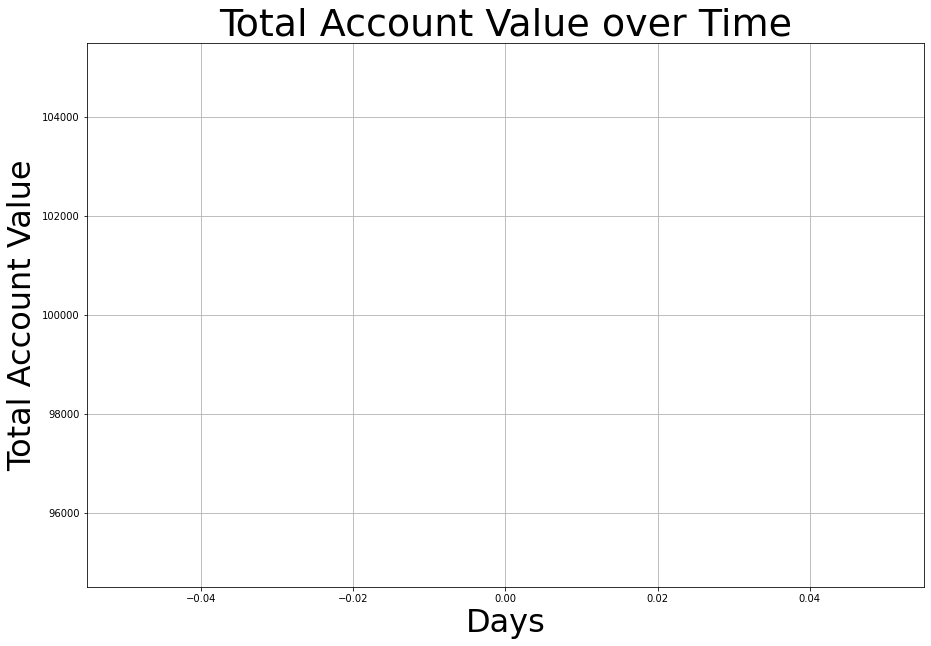

In [49]:
#Part_3

from google.colab import files
uploaded = files.upload()

# Defining the Stock Trading Environment.
"""DON'T MAKE ANY CHANGES TO THE ENVIRONMENT."""


class StockTradingEnvironment(gymnasium.Env):
    """This class implements the Stock Trading environment."""

    def __init__(self, file_path, train=True, number_of_days_to_consider=10):
        """This method initializes the environment.

        :param file_path: - Path of the CSV file containing the historical stock data.
        :param train: - Boolean indicating whether the goal is to train or test the performance of the agent.
        :param number_of_days_to_consider = Integer representing the number of days the for which the agent
                considers the trend in stock price to make a decision."""

        self.file_path = file_path
        self.stock_data = pd.read_csv(self.file_path)
        self.train = train

        # Splitting the data into train and test datasets.
        self.training_stock_data = self.stock_data.iloc[:int(0.8 * len(self.stock_data))]
        self.testing_stock_data = self.stock_data.iloc[int(0.8 * len(self.stock_data)):].reset_index()

        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(8)

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # This defines the number of days for which the agent considers the data before taking an action.
        self.number_of_days_to_consider = number_of_days_to_consider
        # The maximum timesteps the agent will take before the episode ends.
        if self.train:
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider
        else:
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider
        # Initializing the number of steps taken to 0.
        self.timestep = 0
        self.reset()
        

    def reset(self):
        """This method resets the environment and returns the observation.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.

                 info: - info: - A dictionary that can be used to provide additional implementation information."""

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # Initializing the number of steps taken to 0.
        self.timestep = 0

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector that will be passed to the agent.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector.
            observation = [price_increase, stock_held]

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        info = None

        return observation, info

    def step(self, action):
        

        # We give the agent a penalty for taking actions such as buying a stock when the agent doesn't have the
        # investment capital and selling a stock when the agent doesn't have any shares.
        penalty = 0

        if self.train:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.training_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value +=\
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider]\
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        else:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.testing_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = self.training_stock_data['Open'][
                                           self.timestep + self.number_of_days_to_consider] * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        # Determining if the agent currently has shares of the stock or not.
        if self.number_of_shares > 0:
            stock_held = True
        else:
            stock_held = False

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        self.timestep += 1  # Increasing the number of steps taken by the agent by 1.

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        # Computing the total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # Appending the total account value of the list to plot the graph.
        self.total_account_value_list.append(self.total_account_value)

        # The episode terminates when the maximum timesteps have been reached.
        terminated = True if (self.timestep >= self.max_timesteps) \
            else False
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """This method renders the agent's total account value over time.

        :param mode: 'human' renders to the current display or terminal and returns nothing."""

        plt.figure(figsize=(15, 10))
        plt.plot(self.total_account_value_list, color='lightseagreen', linewidth=7)
        plt.xlabel('Days', fontsize=32)
        plt.ylabel('Total Account Value', fontsize=32)
        plt.title('Total Account Value over Time', fontsize=38)
        plt.grid()
        plt.show()

        # NOTE: You can adjust the parameter 'number_of_days_to_consider'

stock_trading_environment = StockTradingEnvironment('./NVDA.csv', number_of_days_to_consider=15)
observation = stock_trading_environment.reset()
action = 1 
observation, reward, terminated, truncated, info = stock_trading_environment.step(action)
stock_trading_environment.render()
